1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


In [100]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

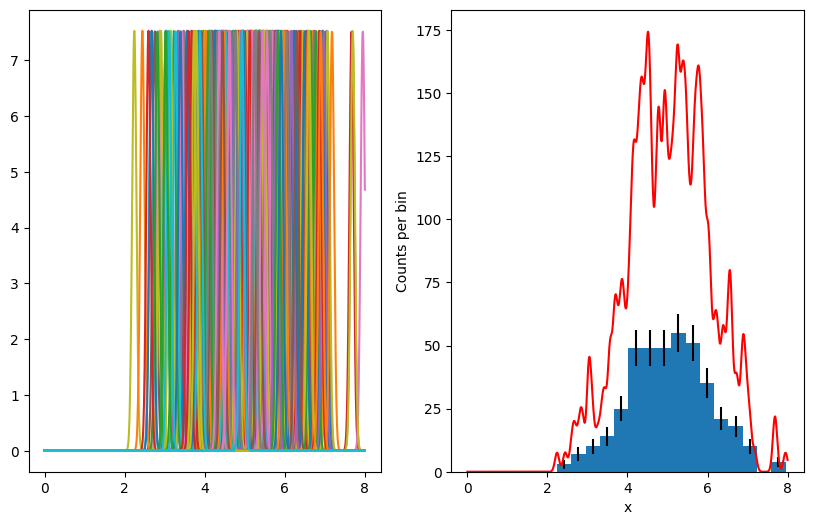

In [103]:
sigma , mu = 1.0, 5.0
N = 400
x = sigma * np.random.randn(N) + mu

fig, (ax0, ax1) = plt.subplots(1,2, figsize=(10,6))
ax1.set_xlabel('x')
ax1.set_ylabel('Counts per bin')
x_hist, bin_edges = np.histogram(x, bins = 'auto')  #returns the hist values and bins
bincenters = 0.5*(bin_edges[1:]+bin_edges[:-1])
sigma_hist    = np.sqrt(x_hist)
width = bin_edges[1]-bin_edges[0]
ax1.bar(bincenters, x_hist, width=width, yerr=sigma_hist)

x_points = np.linspace(0,8,1000)
pdf = np.array([sp.stats.norm.pdf(x_points, loc=mu, scale=1.06*sigma/(N)**0.5) for mu in x])
for a in pdf:
  ax0.plot(x_points,a)

#I = sp.integrate.trapz()
ax1.plot(x_points, pdf.sum(0), 'r-')

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

--2023-11-30 10:20:09--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.69.18, 2620:100:6025:18::a27d:4512
Connessione a www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: /s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png [segue]
--2023-11-30 10:20:10--  https://www.dropbox.com/s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://uc593cc8b2979d8c37a32396bf71.dl.dropboxusercontent.com/cd/0/inline/CIhQL9akM1ALTHjLcoZiExevUmsjjmLyRYPOoj5KCLF6sGDdYtgWsFPLNLUrdHdAcKkPYKi21Vi1U_H6VjjiLU5uUFbrwQYEVU3o40A8JOw4eqSc1UlrlZ1HGMLUc_-9l7k/file# [segue]
--2023-11-30 10:20:10--  https://uc593cc8b2979d8c37a32396bf71.dl.dropboxusercontent.com/cd/0/inline/CIhQL9akM1ALTHjLcoZiExevUmsjjmLyRYPOo

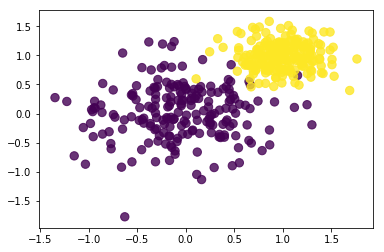

In [102]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot